# Statistical Tests with Statsmodels

From the Pluralsight courses 'Foundations of Statistics and Probability for Machine Learning' and 'Building Statistical Models with Statsmodels' by Janini Ravi

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.api import interaction_plot, abline_plot
from statsmodels.stats.anova import anova_lm  # test significance using ANOVA

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style = "darkgrid")

from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:/Users/imoge/Projects/Datasets/Birthweight_reduced_kg_R.csv")

# Babies Birthweight Data - Independent Samples T-test

In [3]:
data.shape

(42, 16)

The sample size is small

In [4]:
data.head()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0
2,462,58,4.10,39,41,0,35,0,172,58,31,16,25,185,0,1
3,1187,53,4.07,38,44,0,20,0,174,68,26,14,25,189,0,0
4,553,54,3.94,37,42,0,24,0,175,66,30,12,0,184,0,0


In [5]:
data.isnull().sum()

ID             0
Length         0
Birthweight    0
Headcirc       0
Gestation      0
smoker         0
mage           0
mnocig         0
mheight        0
mppwt          0
fage           0
fedyrs         0
fnocig         0
fheight        0
lowbwt         0
mage35         0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           42 non-null     int64  
 1   Length       42 non-null     int64  
 2   Birthweight  42 non-null     float64
 3   Headcirc     42 non-null     int64  
 4   Gestation    42 non-null     int64  
 5   smoker       42 non-null     int64  
 6   mage         42 non-null     int64  
 7   mnocig       42 non-null     int64  
 8   mheight      42 non-null     int64  
 9   mppwt        42 non-null     int64  
 10  fage         42 non-null     int64  
 11  fedyrs       42 non-null     int64  
 12  fnocig       42 non-null     int64  
 13  fheight      42 non-null     int64  
 14  lowbwt       42 non-null     int64  
 15  mage35       42 non-null     int64  
dtypes: float64(1), int64(15)
memory usage: 5.4 KB


In [7]:
data.describe()

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,894.071429,51.333333,3.312857,34.595238,39.190476,0.523810,25.547619,9.428571,164.452381,57.500000,28.904762,13.666667,17.190476,180.500000,0.142857,0.095238
std,467.616186,2.935624,0.603895,2.399792,2.643336,0.505487,5.666342,12.511737,6.504041,7.198408,6.863866,2.160247,17.308165,6.978189,0.354169,0.297102
min,27.000000,43.000000,1.920000,30.000000,33.000000,0.000000,18.000000,0.000000,149.000000,45.000000,19.000000,10.000000,0.000000,169.000000,0.000000,0.000000
25%,537.250000,50.000000,2.940000,33.000000,38.000000,0.000000,20.250000,0.000000,161.000000,52.250000,23.000000,12.000000,0.000000,175.250000,0.000000,0.000000
50%,821.000000,52.000000,3.295000,34.000000,39.500000,1.000000,24.000000,4.500000,164.500000,57.000000,29.500000,14.000000,18.500000,180.500000,0.000000,0.000000
75%,1269.500000,53.000000,3.647500,36.000000,41.000000,1.000000,29.000000,15.750000,169.500000,62.000000,32.000000,16.000000,25.000000,184.750000,0.000000,0.000000
max,1764.000000,58.000000,4.570000,39.000000,45.000000,1.000000,41.000000,50.000000,181.000000,78.000000,46.000000,16.000000,50.000000,200.000000,1.000000,1.000000


## Birth weight by smoker status

In [8]:
data["smoker"].value_counts()

1    22
0    20
Name: smoker, dtype: int64

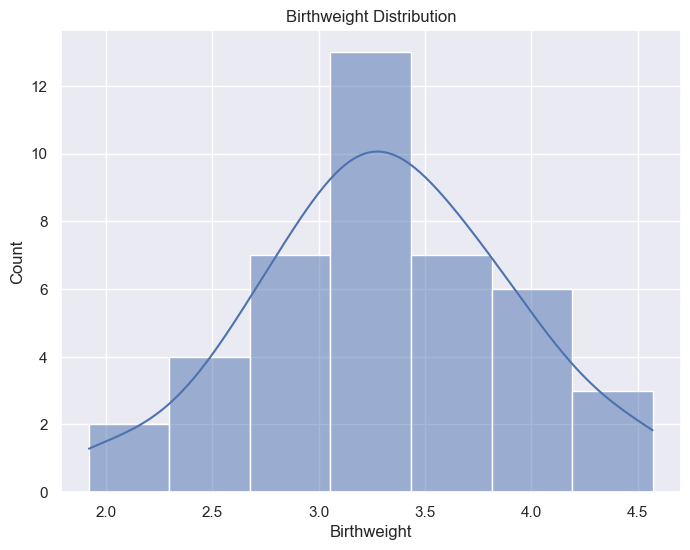

In [9]:
# Plot distribution of birth weights
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data=data,x=data["Birthweight"], kde = True)
plt.title("Birthweight Distribution");

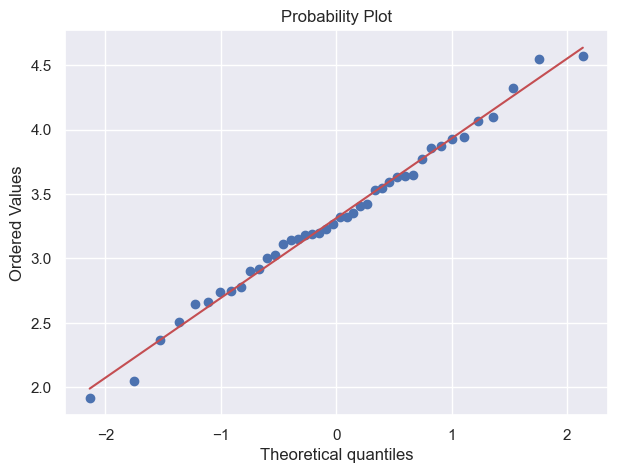

In [10]:
# Check with qq plot
fig, ax = plt.subplots(figsize = (7,5))
stats.probplot(data["Birthweight"], dist = "norm", plot = plt);

In [11]:
# Shapiro test of normality
stats.shapiro(data["Birthweight"])

ShapiroResult(statistic=0.9899008274078369, pvalue=0.9684653878211975)

* The two charts and shapiro test indicate that the data is normally distributed. 
* T- tests do not require it but useful to understand the data

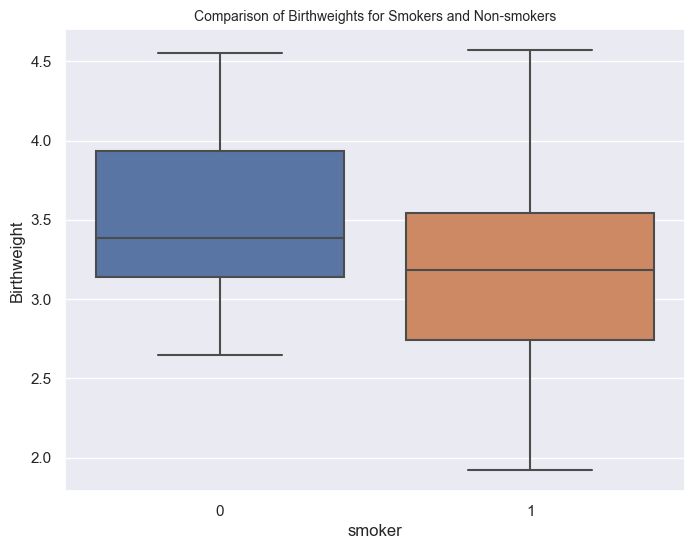

In [12]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = data, x = "smoker", y = "Birthweight")
plt.title("Comparison of Birthweights for Smokers and Non-smokers", fontsize = 10);

The median values are different. There are no outliers. We need a t-test to determine significance

In [13]:
# Split out smokers
smoker = data[data["smoker"] == 1]
smoker.shape

(22, 16)

In [14]:
# Non-smokers
non_smoker = data[data["smoker"] == 0]
non_smoker.shape

(20, 16)

In [15]:
# Take sample of smokers to match size of non-smoker dataset
smoker = smoker.sample(20)
smoker.shape

(20, 16)

In [16]:
# Get the means of each and compare
print(smoker["Birthweight"].mean())
print(non_smoker["Birthweight"].mean())

3.1310000000000002
3.5095000000000005


In [17]:
# Are the variances equal?
stats.levene(smoker["Birthweight"], non_smoker["Birthweight"])

LeveneResult(statistic=0.9231305506264232, pvalue=0.3427283994641287)

In [18]:
# F-test for equality of variances
stats.f_oneway(smoker["Birthweight"], non_smoker["Birthweight"])

F_onewayResult(statistic=4.0408057910665995, pvalue=0.05155017016647299)

Variances are equal and sample sizes are equal so we can run the 2 sample independent t-test

## Two sample independent t-test

In [19]:
# Independent 2 sample t-test
stats.ttest_ind(smoker["Birthweight"], non_smoker["Birthweight"])

Ttest_indResult(statistic=-2.010175562249881, pvalue=0.051550170166472425)

* The p-value which is the probability that a difference between means is due to chance is small and well below the 5% significance level, so we reject the Null Hypothesis of sample means being the same and accept the Alternative Hypothesis. 
* We can say that birthweights of smokers are different to birthweights of non_smokers. Average birthweight between categories is significantly different.

## Head Circumference by Smoker and Non-smoker

In [20]:
data.head(2)

,ID,Length,Birthweight,Headcirc,Gestation,smoker,mage,mnocig,mheight,mppwt,fage,fedyrs,fnocig,fheight,lowbwt,mage35
0,1360,56,4.55,34,44,0,20,0,162,57,23,10,35,179,0,0
1,1016,53,4.32,36,40,0,19,0,171,62,19,12,0,183,0,0


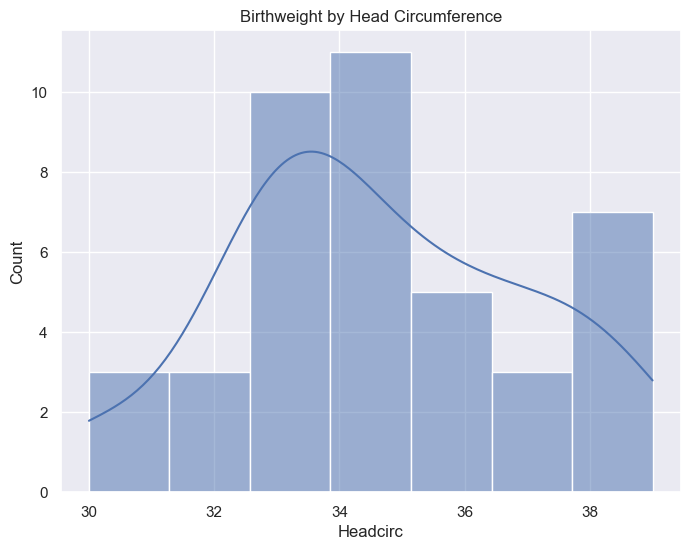

In [21]:
fig, ax = plt.subplots(figsize = (8,6))
sns.histplot(data = data, x = "Headcirc", kde = True)
plt.title("Birthweight by Head Circumference");

The data do not seem to be normally distributed

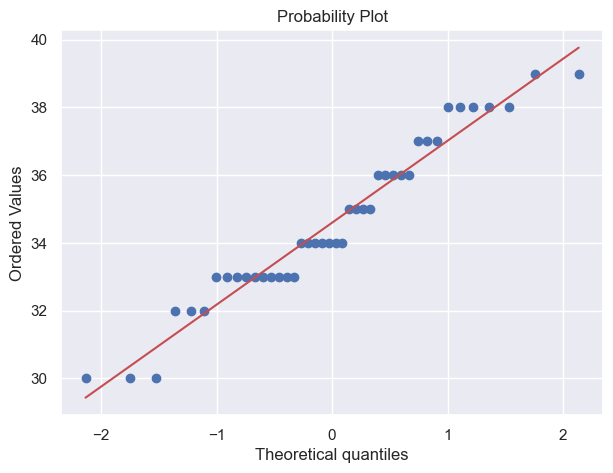

In [22]:
# qq plot
fig, ax = plt.subplots(figsize = (7,5))
stats.probplot(data["Headcirc"], dist = "norm", plot = plt);

In [23]:
# Shapiro test of normality
stats.shapiro(data["Headcirc"])

ShapiroResult(statistic=0.9504269957542419, pvalue=0.06689990311861038)

The data are normally distributed as indicated by Shapiro test for normality even though the plots seem to suggest they are not.

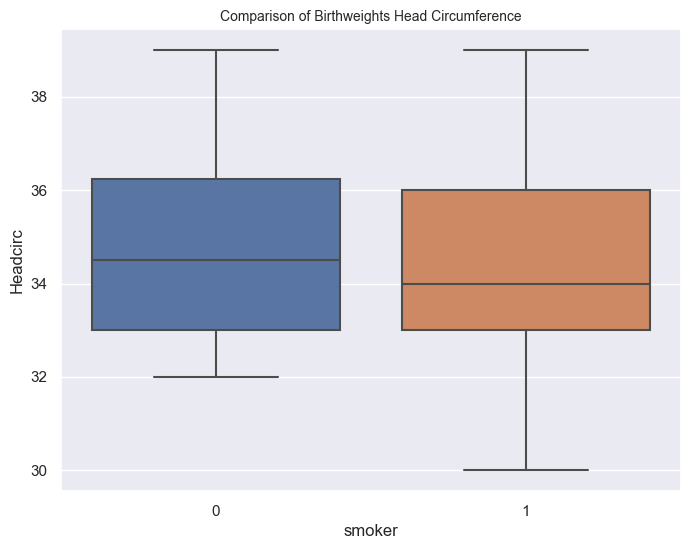

In [24]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = data,  x = data["smoker"],y = "Headcirc")
plt.title("Comparison of Birthweights Head Circumference", fontsize = 10);

* There is a little difference between the two categories.
* There are no outliers so suggests the means are different.

In [25]:
# Are the variances equal
stats.levene(smoker["Headcirc"], non_smoker["Headcirc"])

LeveneResult(statistic=1.3286713286713288, pvalue=0.2562414797491517)

In [26]:
# F-test
stats.f_oneway(smoker["Headcirc"], non_smoker["Headcirc"])

F_onewayResult(statistic=1.0727834142037933, pvalue=0.3068641319903759)

We fail to reject the Null Hypothesis. There is no significant difference in the variance

In [27]:
# Test for a difference in means of the two groups in terms of head circumferenced
stats.ttest_ind(smoker["Headcirc"],non_smoker["Headcirc"])

Ttest_indResult(statistic=-1.0357525834888301, pvalue=0.30686413199037615)

We fail to reject the Null Hypothesis. There is no significant difference in the variance

# Job Test Dataset - Independent Samples T-test

In [28]:
jobs = pd.read_csv("C:/Users/imoge/Projects/Datasets/jobtest.csv")

In [29]:
jobs.shape

(20, 3)

Less than 30 datapoints so we need to test for normality

In [30]:
jobs.head()

,TEST,MINORITY,JPERF
0,0.28,1,1.83
1,0.97,1,4.59
2,1.25,1,2.97
3,2.46,1,8.14
4,2.51,1,8.00


In [31]:
jobs.isnull().sum()

TEST        0
MINORITY    0
JPERF       0
dtype: int64

In [32]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TEST      20 non-null     float64
 1   MINORITY  20 non-null     int64  
 2   JPERF     20 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 608.0 bytes


In [33]:
jobs["MINORITY"].value_counts()

1    10
0    10
Name: MINORITY, dtype: int64

In [34]:
jobs.describe().T

,count,mean,std,min,25%,50%,75%,max
TEST,20.0,1.4715,0.678390,0.28,1.120,1.515,2.0075,2.51
MINORITY,20.0,0.5000,0.512989,0.00,0.000,0.500,1.0000,1.00
JPERF,20.0,4.5085,2.227711,1.39,2.965,4.220,6.0275,8.14


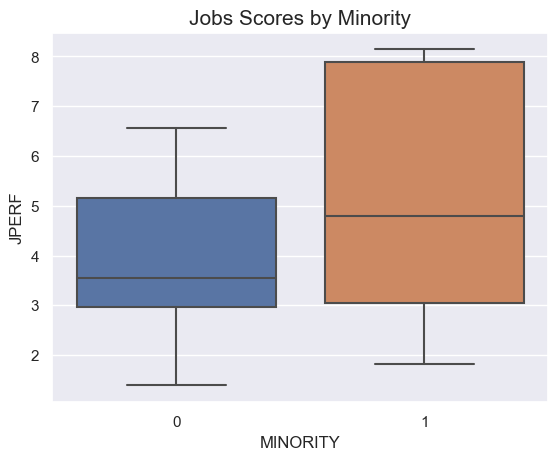

In [35]:
# Check the distribution by minority group for job performance scores
sns.boxplot(data = jobs, x = "MINORITY", y = "JPERF")
plt.title("Jobs Scores by Minority", fontsize = 15);

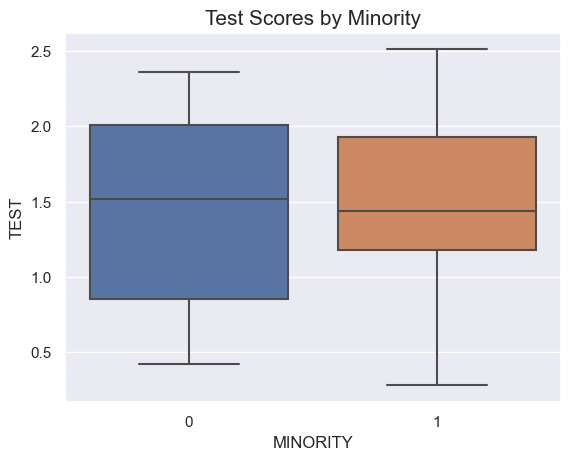

In [36]:
# Check the distribution by minority group for test scores
sns.boxplot(data = jobs, x = "MINORITY", y = "TEST")
plt.title("Test Scores by Minority", fontsize = 15);

There appear to be some difference for job and test scores between the minority and non-minority categories. But is it statistically significant?

## Tests for normality of data

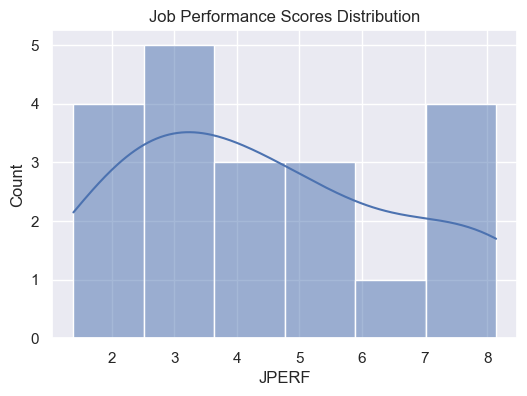

In [37]:
# Plot distribution of job performance scores
fig, ax = plt.subplots(figsize = (6,4))
sns.histplot(data=jobs,x=jobs["JPERF"], kde = True)
plt.title("Job Performance Scores Distribution");

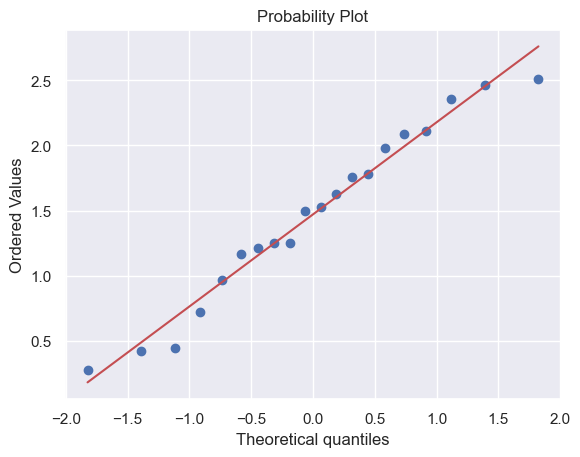

In [38]:
stats.probplot(jobs["TEST"], dist = "norm", plot = plt);

In [39]:
stats.shapiro(jobs["JPERF"])

ShapiroResult(statistic=0.9210786819458008, pvalue=0.10393870621919632)

We fail to reject the null hypothesis. Job test scores are normally distributed

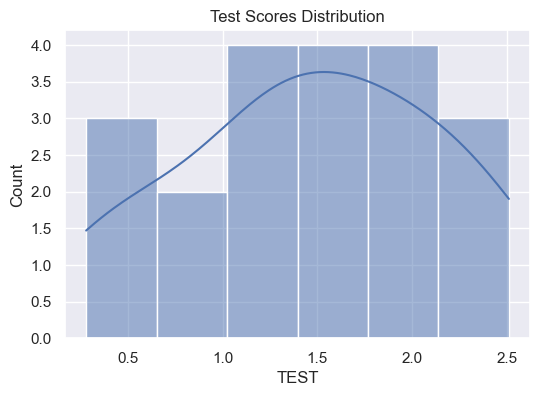

In [40]:
# Plot distribution of job performance scores
fig, ax = plt.subplots(figsize = (6,4))
sns.histplot(data=jobs,x=jobs["TEST"], kde = True)
plt.title("Test Scores Distribution");

Don't appear normally distributed scores

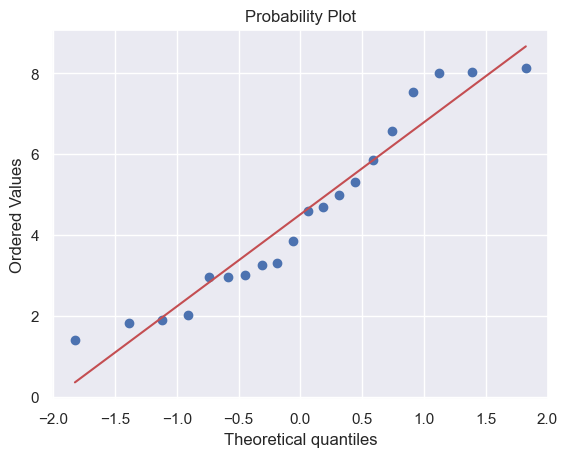

In [41]:
stats.probplot(jobs["JPERF"], dist = "norm", plot = plt);

Some movement around the normal line

In [42]:
stats.shapiro(jobs["TEST"])

ShapiroResult(statistic=0.9602042436599731, pvalue=0.5479376316070557)

We fail to reject the null hypothesis. Test scores are also normally distributed.

## Test for equality of variance

In [43]:
# Split into two groups
minority = jobs[jobs["MINORITY"] == 1]
non = jobs[jobs["MINORITY"] == 0]

In [44]:
print(stats.levene(minority["JPERF"], non["JPERF"]))
print(stats.levene(minority["TEST"], non["TEST"]))

LeveneResult(statistic=2.874032553718725, pvalue=0.10724769688196249)
LeveneResult(statistic=0.0002879897603640764, pvalue=0.98664703208659)


In [45]:
print(stats.f_oneway(minority["JPERF"], non["JPERF"]))
print(stats.f_oneway(minority["TEST"], non["TEST"]))

F_onewayResult(statistic=1.680582262526025, pvalue=0.21122206282829192)
F_onewayResult(statistic=0.11419703001405239, pvalue=0.7393248427260621)


We fail to reject the null hypothesis. We have equality of variances for job performance scores and test scores between the minority and non-minority groups. 

## T-tests

#### Is there a significant difference between minority and non-minority groups in job performance scores?

In [46]:
# Independent t test. H0 - job performance is not different. Alternative is that they are different.
stats.ttest_ind(minority["JPERF"], non["JPERF"])

Ttest_indResult(statistic=1.2963727328689167, pvalue=0.211222062828292)

The p-value is well above 0.05, so we fail to reject the null hypothesis that the job performance is different

#### Do those who score highly on the test also score highly on the job performance scores?

In [47]:
# For the test results we split the data between those achieving above the median score and those achieving below the median score
jobs.describe()

,TEST,MINORITY,JPERF
count,20.00000,20.000000,20.000000
mean,1.47150,0.500000,4.508500
std,0.67839,0.512989,2.227711
min,0.28000,0.000000,1.390000
25%,1.12000,0.000000,2.965000
50%,1.51500,0.500000,4.220000
75%,2.00750,1.000000,6.027500
max,2.51000,1.000000,8.140000


In [48]:
# Those achieving above and below the test scores
above = jobs[jobs["TEST"]>1.51]
below = jobs[jobs["TEST"]<1.151]

In [49]:
# Independent t test. H0 - job performance is not different. Alternative is that they are different.
stats.ttest_ind(above["JPERF"], below["JPERF"])

Ttest_indResult(statistic=3.2298589939558253, pvalue=0.006578384501470013)

* H0: There is no difference in the job performance scores of those who had test scores above the median and below
* H1: There is a difference

The low p-value suggests there is a significant difference between them. We can conclude that those scoring highly on the test scores will also score highly on the job performance score.

# Crime Dataset - Paired Samples T-test

In [50]:
crime = pd.read_csv("C:/Users/imoge/Projects/Datasets/Crime_R.csv")

In [51]:
crime.shape

(47, 27)

In [52]:
crime.head()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
0,45.5,135,0,12.4,69,540,965,0,6,80,...,71,564,974,0,6,82,20,1,632,142
1,52.3,140,0,10.9,55,535,1045,1,6,135,...,54,540,1039,1,7,138,39,1,521,210
2,56.6,157,1,11.2,47,512,962,0,22,97,...,44,529,959,0,24,98,33,0,359,256
3,60.3,139,1,11.9,46,480,968,0,19,135,...,41,497,983,0,20,131,50,0,510,235
4,64.2,126,0,12.2,106,599,989,0,40,78,...,97,602,989,0,42,79,24,1,660,162


In [53]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CrimeRate            47 non-null     float64
 1   Youth                47 non-null     int64  
 2   Southern             47 non-null     int64  
 3   Education            47 non-null     float64
 4   ExpenditureYear0     47 non-null     int64  
 5   LabourForce          47 non-null     int64  
 6   Males                47 non-null     int64  
 7   MoreMales            47 non-null     int64  
 8   StateSize            47 non-null     int64  
 9   YouthUnemployment    47 non-null     int64  
 10  MatureUnemployment   47 non-null     int64  
 11  HighYouthUnemploy    47 non-null     int64  
 12  Wage                 47 non-null     int64  
 13  BelowWage            47 non-null     int64  
 14  CrimeRate10          47 non-null     float64
 15  Youth10              47 non-null     int64

## Crime Data Exploratory Data Analysis

In [54]:
crime.describe()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,102.808511,138.574468,0.340426,12.391489,85.000000,561.191489,983.021277,0.191489,36.617021,95.468085,...,80.234043,565.531915,986.872340,0.212766,37.702128,97.446809,33.361702,0.404255,594.638298,192.957447
std,28.893266,12.567634,0.478975,1.120332,29.718974,40.411814,29.467365,0.397727,38.071188,18.028783,...,27.961319,37.645284,29.845702,0.413688,39.490734,17.843289,8.414340,0.496053,93.749765,38.756182
min,45.500000,119.000000,0.000000,10.000000,45.000000,480.000000,934.000000,0.000000,3.000000,70.000000,...,41.000000,497.000000,935.000000,0.000000,3.000000,71.000000,15.000000,0.000000,359.000000,126.000000
25%,82.700000,130.000000,0.000000,11.550000,62.500000,530.500000,964.500000,0.000000,10.000000,80.500000,...,58.500000,538.000000,969.500000,0.000000,11.000000,82.000000,28.000000,0.000000,530.000000,165.000000
50%,103.000000,136.000000,0.000000,12.400000,78.000000,560.000000,977.000000,0.000000,25.000000,92.000000,...,73.000000,563.000000,983.000000,0.000000,25.000000,93.000000,34.000000,0.000000,615.000000,182.000000
75%,120.650000,146.000000,1.000000,13.200000,104.500000,593.000000,992.000000,0.000000,41.500000,104.000000,...,97.000000,599.000000,994.000000,0.000000,43.000000,108.500000,39.000000,1.000000,659.500000,229.500000
max,161.800000,177.000000,1.000000,15.100000,166.000000,641.000000,1071.000000,1.000000,168.000000,142.000000,...,157.000000,641.000000,1079.000000,1.000000,180.000000,143.000000,59.000000,1.000000,748.000000,257.000000


In [139]:
# Difference between the means
crime.describe().T

,count,mean,std,min,25%,50%,75%,max
CrimeRate,47.0,102.808511,28.893266,45.5,82.70,103.0,120.65,161.8
Youth,47.0,138.574468,12.567634,119.0,130.00,136.0,146.00,177.0
Southern,47.0,0.340426,0.478975,0.0,0.00,0.0,1.00,1.0
Education,47.0,12.391489,1.120332,10.0,11.55,12.4,13.20,15.1
ExpenditureYear0,47.0,85.000000,29.718974,45.0,62.50,78.0,104.50,166.0
LabourForce,47.0,561.191489,40.411814,480.0,530.50,560.0,593.00,641.0
Males,47.0,983.021277,29.467365,934.0,964.50,977.0,992.00,1071.0
MoreMales,47.0,0.191489,0.397727,0.0,0.00,0.0,0.00,1.0
StateSize,47.0,36.617021,38.071188,3.0,10.00,25.0,41.50,168.0
YouthUnemployment,47.0,95.468085,18.028783,70.0,80.50,92.0,104.00,142.0


In [140]:
# Split out the data for the two years into a separate dataframe
crime_df = crime[["ExpenditureYear0","ExpenditureYear10"]]

In [141]:
crime_df.head()

,ExpenditureYear0,ExpenditureYear10
0,69,71
1,55,54
2,47,44
3,46,41
4,106,97


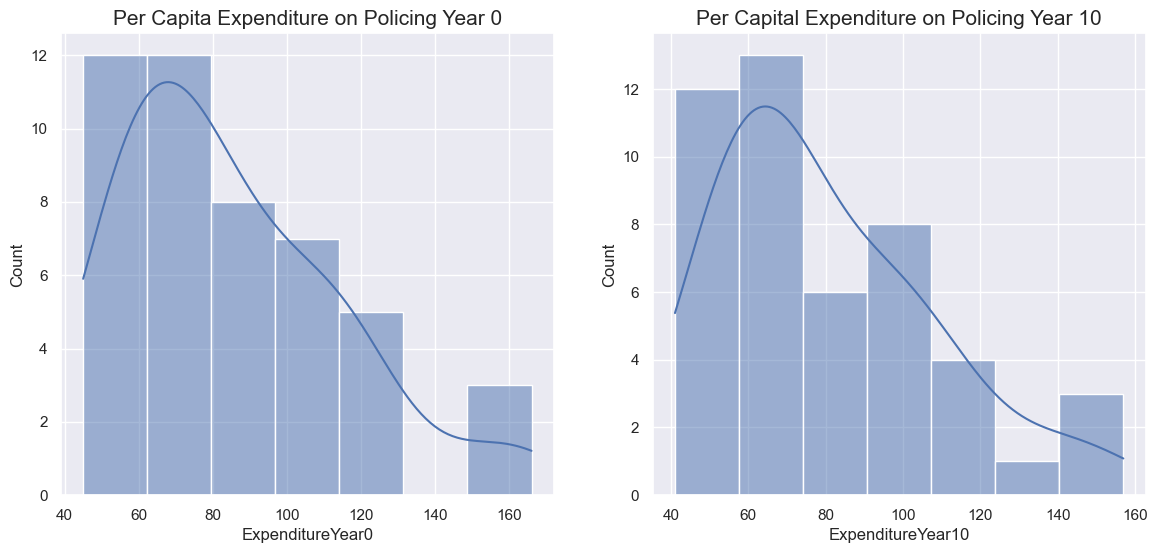

In [142]:
fig, axs = plt.subplots(figsize = (14,6), ncols = 2)
sns.histplot(data = crime_df, x = crime_df["ExpenditureYear0"], kde = True, ax = axs[0])
sns.histplot(data = crime_df, x = crime_df["ExpenditureYear10"], kde = True, ax = axs[1])
axs[0].set_title("Per Capita Expenditure on Policing Year 0", fontsize = 15)
axs[1].set_title("Per Capital Expenditure on Policing Year 10", fontsize = 15);

Distribution is positive skewed

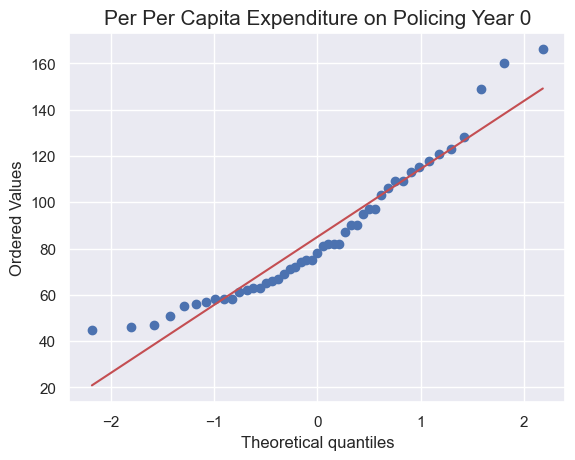

In [143]:
fig, axs = plt.subplots()
stats.probplot(crime_df["ExpenditureYear0"], dist = "norm", plot= plt)
plt.title("Per Per Capita Expenditure on Policing Year 0", fontsize = 15);

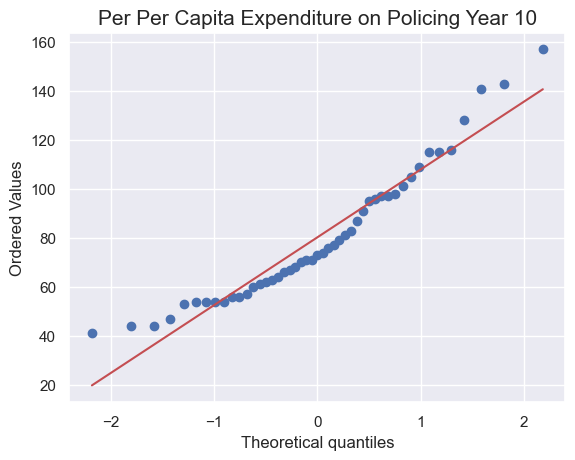

In [144]:
fig, axs = plt.subplots()
stats.probplot(crime_df["ExpenditureYear10"], dist = "norm", plot= plt)
plt.title("Per Per Capita Expenditure on Policing Year 10", fontsize = 15);

In [145]:
print(stats.shapiro(crime_df["ExpenditureYear0"]))
print("/n")
print(stats.shapiro(crime["ExpenditureYear10"]))

ShapiroResult(statistic=0.9230725765228271, pvalue=0.004280915018171072)
/n
ShapiroResult(statistic=0.9283058047294617, pvalue=0.006580706220120192)


* The charts indicate that the data is not normally distributed.
* The Shapiro p-value is well below 5% significance so we can reject the null hypothesis. The data are not normally distributed.
* However the assumption is that the difference between the pairs is normally distributed and not necessarily the actual distributions of each dataset

In [146]:
# Calculate the difference
crime_df["Diff"] = crime_df["ExpenditureYear10"] - crime_df["ExpenditureYear0"]
crime_df.head()

,ExpenditureYear0,ExpenditureYear10,Diff
0,69,71,2
1,55,54,-1
2,47,44,-3
3,46,41,-5
4,106,97,-9


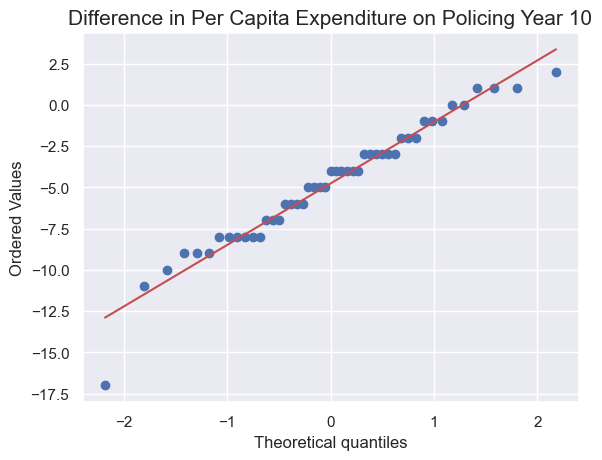

In [147]:
fig, axs = plt.subplots()
stats.probplot(crime_df["Diff"], dist = "norm", plot= plt)
plt.title("Difference in Per Capita Expenditure on Policing Year 10", fontsize = 15);

Not so much difference here. Appears almost normal

In [148]:
print(stats.shapiro(crime_df["Diff"]))

ShapiroResult(statistic=0.9627880454063416, pvalue=0.13875140249729156)


The Shapiro test indicates we cannot reject the null hypothesis, the difference between the samples is normally distributed.

In [149]:
# Melt the dataframe to get the data into one column
new_df = pd.melt(crime_df, value_vars = ["ExpenditureYear0", "ExpenditureYear10"], var_name = "Year", value_name = "Expenditure")
new_df

,Year,Expenditure
0,ExpenditureYear0,69
1,ExpenditureYear0,55
2,ExpenditureYear0,47
3,ExpenditureYear0,46
4,ExpenditureYear0,106
...,...,...
89,ExpenditureYear10,109
90,ExpenditureYear10,95
91,ExpenditureYear10,116
92,ExpenditureYear10,141


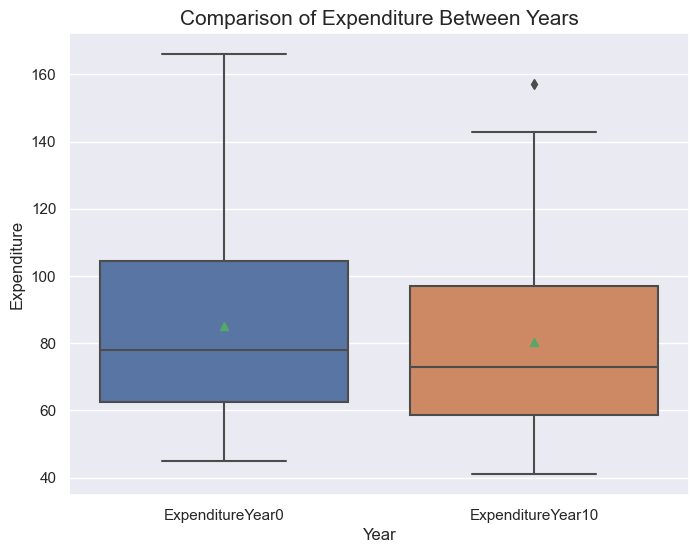

In [150]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = new_df, x = "Year", y = "Expenditure",showmeans = True)
plt.title("Comparison of Expenditure Between Years", fontsize = 15);

In [151]:
# Are the variances equal?
stats.levene(crime_df["ExpenditureYear0"], crime_df["ExpenditureYear10"])

LeveneResult(statistic=0.12229515954059589, pvalue=0.7273576766203647)

The variances are equal based on the levene test

## Paired Samples T-test

In [152]:
# Paired t-test
stats.ttest_rel(crime_df["ExpenditureYear0"], crime_df["ExpenditureYear10"])

Ttest_relResult(statistic=8.811976044793944, pvalue=1.9360060460713323e-11)

We can reject the null hypothesis, there is a difference between the mean spend between the two years.

# ONE-WAY ANOVA

#### Does minority status affect job performance scores

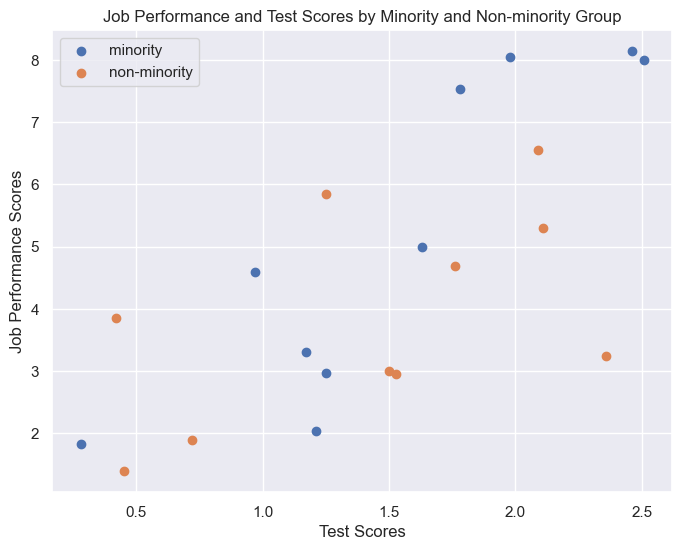

In [153]:
# Plot the test and job performance scores for minority and non-minority
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(minority["TEST"], minority["JPERF"])
plt.scatter(non["TEST"], non["JPERF"])
plt.legend(["minority", "non-minority"])
plt.title("Job Performance and Test Scores by Minority and Non-minority Group")
plt.xlabel("Test Scores")
plt.ylabel("Job Performance Scores");

In [154]:
# Set X and y and add constant
X = jobs["MINORITY"]
y = jobs["JPERF"]

X = sm.add_constant(X)

In [155]:
minority_model = sm.OLS(y,X).fit() # endog then exog
minority_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  JPERF   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     1.681
Date:                Tue, 10 Jan 2023   Prob (F-statistic):              0.211
Time:                        10:33:18   Log-Likelihood:                -42.993
No. Observations:                  20   AIC:                             89.99
Df Residuals:                      18   BIC:                             91.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8740      0.692      5.597      0.000       2.420       5.328
MINORITY       1.2690      0.979      1.296      0.211      -0.788       3.326
==============================================================================
Omnibus:                        4.396   Durbin-Watson:                   2.465
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                1.462
Skew:                           0.060   Prob(JB):                        0.481
Kurtosis:                       1.681   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* The p-value for the minority coefficient suggests it is insignificant so we fail to reject the null hypothesis.
* The F-score (p-value)  also suggests the regression is not significant

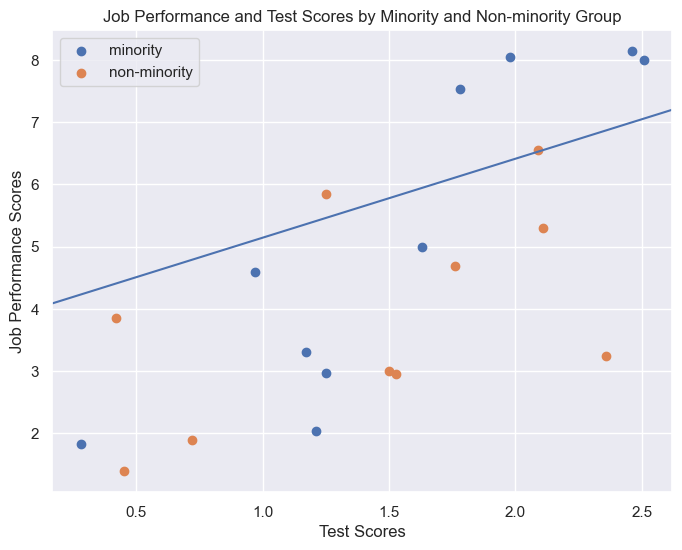

In [156]:
# Plot the test and job performance scores for minority and non-minority with the fitted line
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(minority["TEST"], minority["JPERF"])
plt.scatter(non["TEST"], non["JPERF"])
fig = abline_plot(model_results = minority_model, ax = ax)
plt.legend(["minority", "non-minority"])
plt.title("Job Performance and Test Scores by Minority and Non-minority Group")
plt.xlabel("Test Scores")
plt.ylabel("Job Performance Scores");

In [157]:
from statsmodels.formula.api import ols
minority_model = ols('JPERF ~ C(MINORITY)', data = jobs).fit()
anova_lm(minority_model)

,df,sum_sq,mean_sq,F,PR(>F)
C(MINORITY),1.0,8.051805,8.051805,1.680582,0.211222
Residual,18.0,86.239450,4.791081,NaN,NaN


#### Does test score affect job performance scores?

In [158]:
# Set X and y and add constant
X = jobs["TEST"]
y = jobs["JPERF"]

X = sm.add_constant(X)

test_model = sm.OLS(y,X).fit() # endog then exog
test_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  JPERF   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.490
Method:                 Least Squares   F-statistic:                     19.25
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           0.000356
Time:                        10:33:18   Log-Likelihood:                -36.614
No. Observations:                  20   AIC:                             77.23
Df Residuals:                      18   BIC:                             79.22
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0350      0.868      1.192      0.249      -0.789       2.859
TEST           2.3605      0.538      4.387      0.000       1.230       3.491
==============================================================================
Omnibus:                        0.324   Durbin-Watson:                   2.896
Prob(Omnibus):                  0.850   Jarque-Bera (JB):                0.483
Skew:                          -0.186   Prob(JB):                        0.785
Kurtosis:                       2.336   Cond. No.                         5.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The test score has a low p-value so is significant and the f-stat is also significant

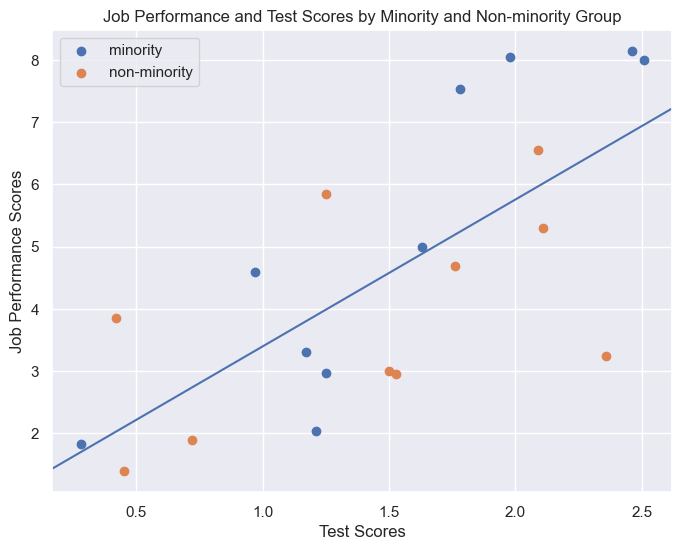

In [159]:
# Plot the test and job performance scores for minority and non-minority with the fitted line
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(minority["TEST"], minority["JPERF"])
plt.scatter(non["TEST"], non["JPERF"])
fig = abline_plot(model_results = test_model, ax = ax)
plt.legend(["minority", "non-minority"])
plt.title("Job Performance and Test Scores by Minority and Non-minority Group")
plt.xlabel("Test Scores")
plt.ylabel("Job Performance Scores");

The line fitted on test scores appears to fit the data better than that for minority status

In [160]:
test_model = ols('JPERF ~ (TEST)', data = jobs).fit()
anova_lm(test_model)

,df,sum_sq,mean_sq,F,PR(>F)
TEST,1.0,48.722958,48.722958,19.246127,0.000356
Residual,18.0,45.568297,2.531572,NaN,NaN


## Two Way ANOVA

In [161]:
model_2way = ols('JPERF ~ TEST + MINORITY', data = jobs).fit()  # assumes no interaction between test score and minority

In [162]:
model_2way.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  JPERF   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.522
Method:                 Least Squares   F-statistic:                     11.38
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           0.000731
Time:                        10:33:19   Log-Likelihood:                -35.390
No. Observations:                  20   AIC:                             76.78
Df Residuals:                      17   BIC:                             79.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6120      0.887      0.690      0.500      -1.260       2.483
TEST           2.2988      0.522      4.400      0.000       1.197       3.401
MINORITY       1.0276      0.691      1.487      0.155      -0.430       2.485
==============================================================================
Omnibus:                        0.251   Durbin-Watson:                   3.028
Prob(Omnibus):                  0.882   Jarque-Bera (JB):                0.437
Skew:                          -0.059   Prob(JB):                        0.804
Kurtosis:                       2.286   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [163]:
anova_lm(model_2way)

,df,sum_sq,mean_sq,F,PR(>F)
TEST,1.0,48.722958,48.722958,20.542126,0.000295
MINORITY,1.0,5.246751,5.246751,2.212087,0.155246
Residual,17.0,40.321546,2.371856,NaN,NaN


In [164]:
model_2way_interact = ols('JPERF ~ TEST + TEST:MINORITY', data = jobs).fit()  # assumes interaction
model_2way_interact.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  JPERF   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     14.59
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           0.000204
Time:                        10:33:19   Log-Likelihood:                -33.891
No. Observations:                  20   AIC:                             73.78
Df Residuals:                      17   BIC:                             76.77
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1211      0.780      1.437      0.169      -0.525       2.768
TEST              1.8276      0.536      3.412      0.003       0.698       2.958
TEST:MINORITY     0.9161      0.397      2.306      0.034       0.078       1.754
==============================================================================
Omnibus:                        0.388   Durbin-Watson:                   3.008
Prob(Omnibus):                  0.823   Jarque-Bera (JB):                0.514
Skew:                           0.050   Prob(JB):                        0.773
Kurtosis:                       2.221   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
anova_lm(model_2way_interact)

,df,sum_sq,mean_sq,F,PR(>F)
TEST,1.0,48.722958,48.722958,23.864774,0.000139
TEST:MINORITY,1.0,10.860644,10.860644,5.319603,0.033949
Residual,17.0,34.707653,2.041627,NaN,NaN


* Test scores are significant
* Influence of minority on job performance scores is not significant
* 

# Car Price Dataset

In [166]:
df = pd.read_csv("C:/Users/imoge/Projects/Datasets/CarPrice_Assignment.csv")

In [167]:
df.shape

(205, 26)

In [168]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Car Price Data Exploratory Data Analysis

In [170]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


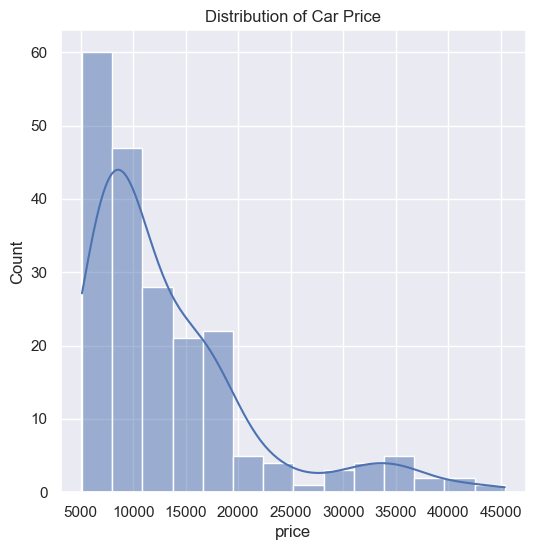

In [171]:
# How is the price variable distributed?
fig, ax = plt.subplots(figsize = (6,6))
sns.histplot(data = df, x = "price", kde = True)
plt.title("Distribution of Car Price");

The data is not normally distributed, it is positively skewed, so most car prices are up to about 20,000 dollars

## Relationship between price of car and the type of fuel used

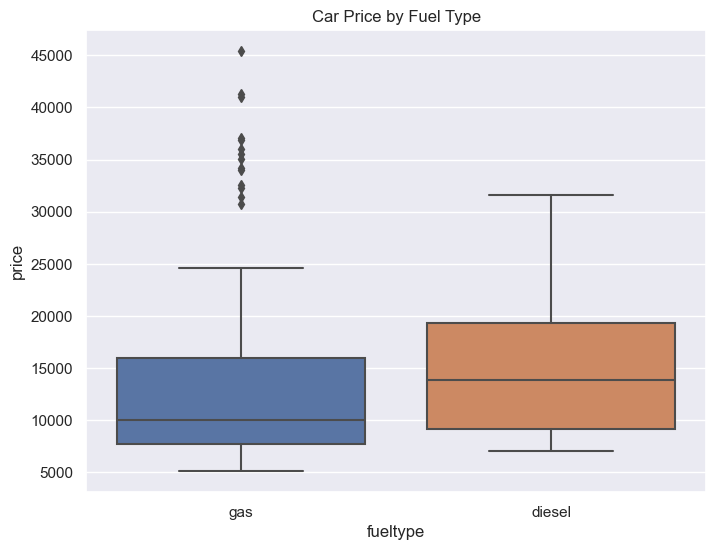

In [172]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, x = "fueltype", y = "price" )
plt.title("Car Price by Fuel Type");

Diesel cars tend to be higher overall. There are more outliers in the gas category

## Relationship between price and the wheel drive of the car

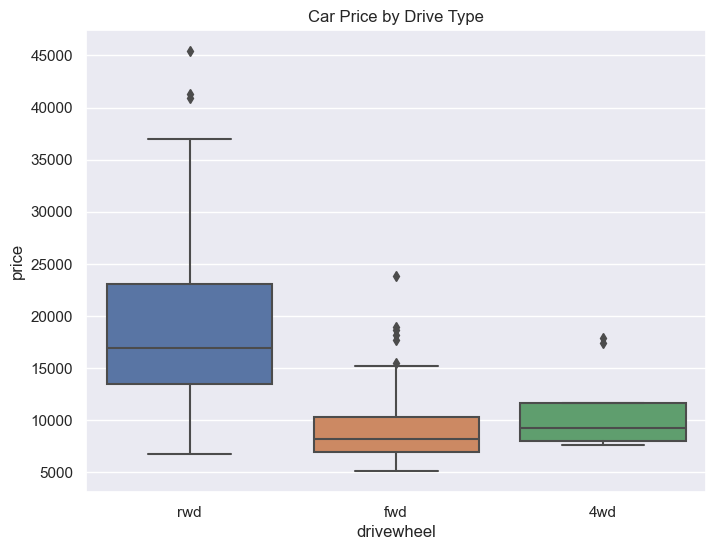

In [173]:
fig, ax = plt.subplots(figsize = (8,6))
sns.boxplot(data = df, x = "drivewheel", y = "price" )
plt.title("Car Price by Drive Type");

Appears that rear wheel drives are more expensive than forward drive cars

## Price of car relative to horsepower

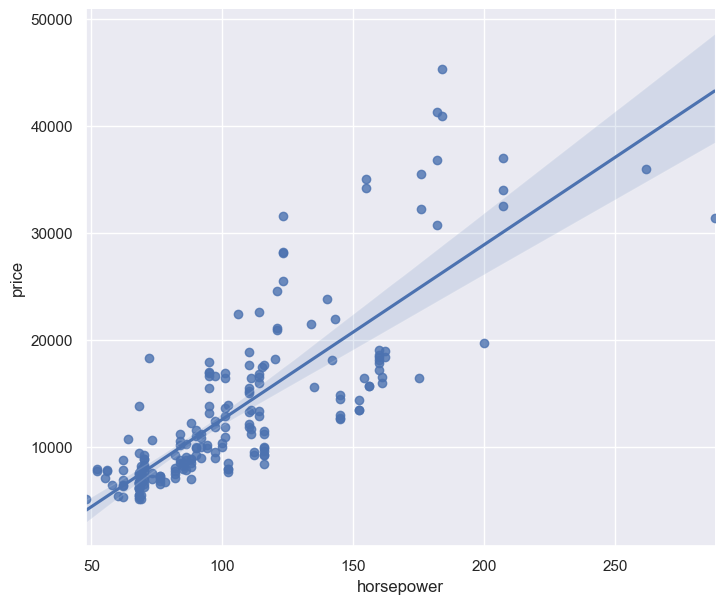

In [174]:
# Plot the data with a regression line
sns.lmplot(data = df, x = "horsepower", y = "price", height = 6, aspect = 1.2);

There appears to be a linear relationship between horsepower and price so performing a linear regression makes sense

## Simple Linear Regression

In [175]:
# Shuffle the data so the model has to learn from scratch
df = df.sample(frac = 1).reset_index(drop = True)

In [176]:
# Set dependent and independent variables
X = df["horsepower"]
y = df["price"]

In [177]:
# Set a constant to represent the intercept
X = sm.add_constant(X)

In [178]:
X.head()

,const,horsepower
0,1.0,88
1,1.0,121
2,1.0,76
3,1.0,82
4,1.0,123


In [179]:
new = pd.concat([X,y],axis = 1)

In [180]:
# Split data into training and test set
train = new.sample(frac = 0.8)
test = new.drop(train.index)

In [181]:
# Check the shape
print(train.shape, test.shape)

(164, 3) (41, 3)


In [182]:
# Split into X and y train and test sets
X_train = train[["const","horsepower"]]
y_train = train[["price"]]
X_test = test[["const","horsepower"]]
y_test = test[["price"]]

In [183]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(164, 2) (41, 2) (164, 1) (41, 1)


In [184]:
# Set up regression model using statsmodels [y_train first!!]
model = sm.OLS(y_train, X_train).fit()
model

In [185]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     283.0
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           2.21e-37
Time:                        10:33:20   Log-Likelihood:                -1619.6
No. Observations:                 164   AIC:                             3243.
Df Residuals:                     162   BIC:                             3249.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3460.5779   1051.127     -3.292      0.001   -5536.255   -1384.900
horsepower   160.8574      9.561     16.824      0.000     141.977     179.738
==============================================================================
Omnibus:                       46.986   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.986
Skew:                           1.267   Prob(JB):                     7.15e-23
Kurtosis:                       5.916   Cond. No.                         313.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* r2 of 0.68 means 68% of the variation in the price can be explained by horsepower but 32% not explained
* Horsepower is significant as the p value is very small
* The model is as a whole valid according to the F-statistic. Coefficients are not equal to zero
* Each increase of one unit of horsepower is associated with a 166 dollar increase in price

In [186]:
# Get fitted values and residuals from the model
res = model.resid
fit = model.fittedvalues

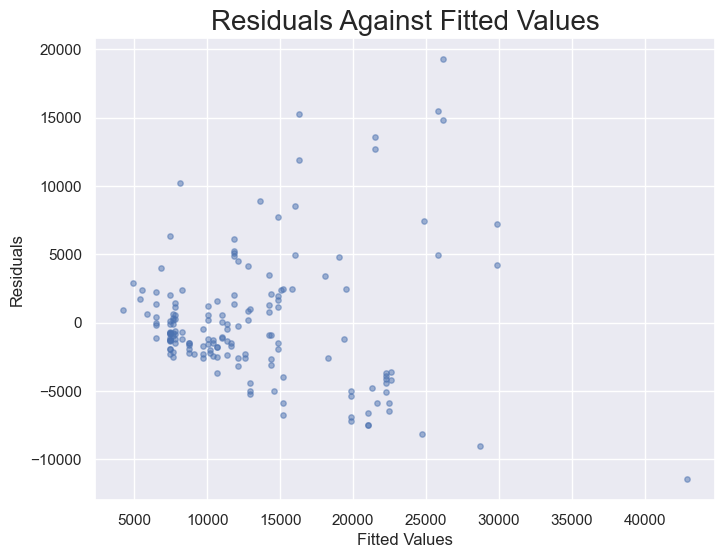

In [187]:
# Plot residuals against fitted values
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(x = fit, y = res, s = 15, alpha = 0.5)
plt.title("Residuals Against Fitted Values", fontsize = 20)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals");

* There is some heteroscedasticity or variance in the residuals.
* This can make coefficients less precise.
* Lower precision increases the likelihood that the coefficient estimates are further from the correct population value.
* Heteroscedasticity tends to produce p-values that are smaller than they should be. This effect occurs because heteroscedasticity increases the variance of the coefficient estimates but the OLS procedure does not detect this increase. * Consequently, OLS calculates the t-values and F-values using an underestimated amount of variance. 
* This problem can lead you to conclude that a model term is statistically significant when it is actually not significant.

eval_env: 1


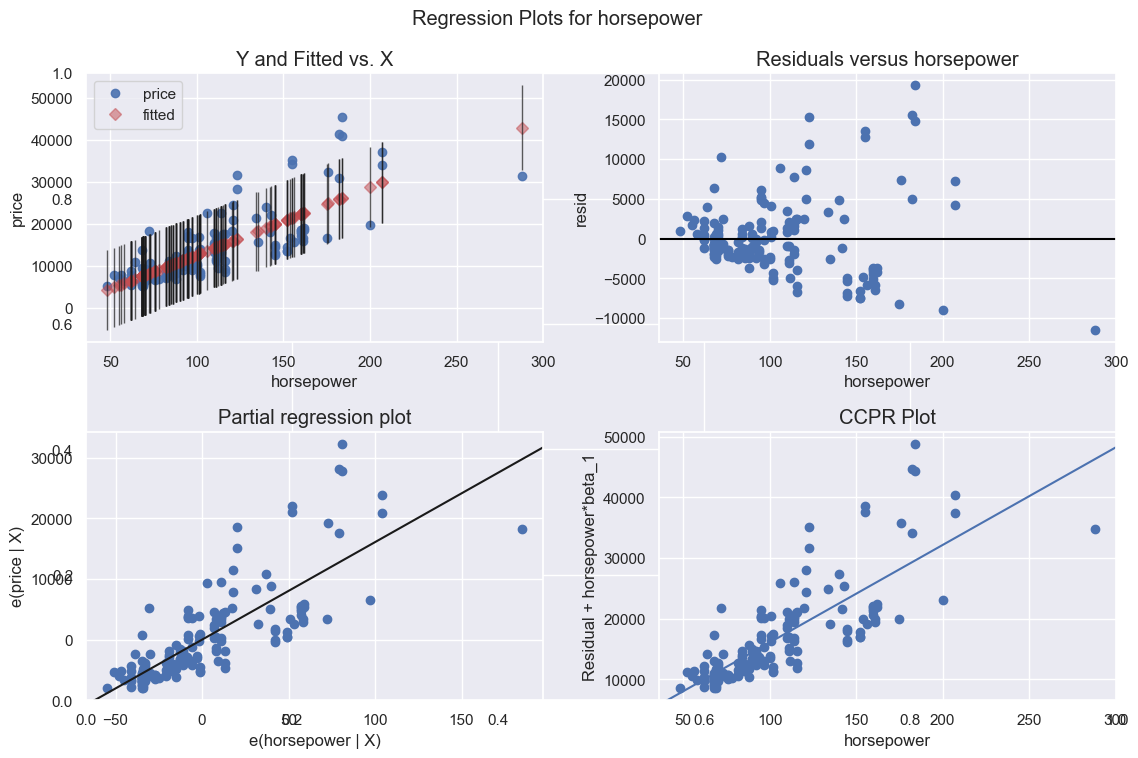

In [188]:
# View regressor results against a single regressor
fig, ax = plt.subplots(figsize = (12,8))
sm.graphics.plot_regress_exog(model,'horsepower',fig = fig);

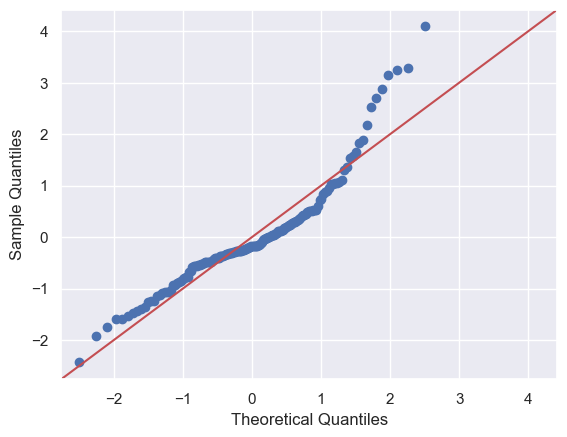

In [189]:
res = model.resid
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

There is some variation around the normal line, so we cannot decide that the model is good.

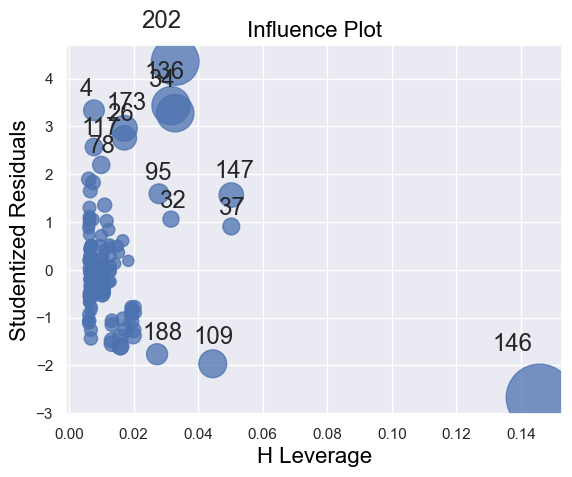

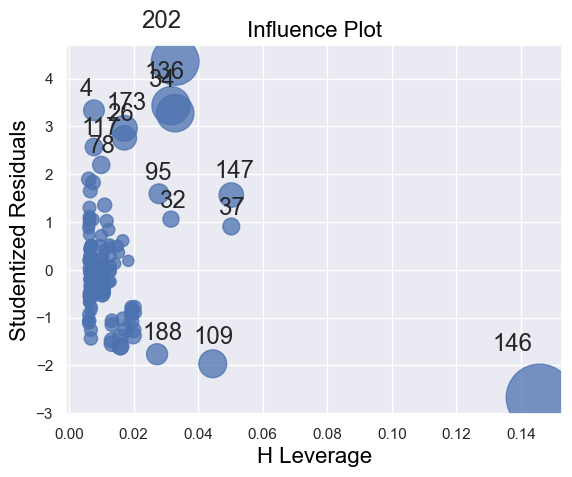

In [190]:
# Influence plot
sm.graphics.influence_plot(model)

Which datapoints have the most influence on the regression

In [191]:
# Predict on the test values
y_pred = model.predict(X_test)
y_pred[0:10]

0     10694.876440
1     16003.171825
6     21633.182081
17    15198.884646
21     7799.442594
29    14233.740030
36    12946.880543
52    15198.884646
60    29836.911312
61    15198.884646
dtype: float64

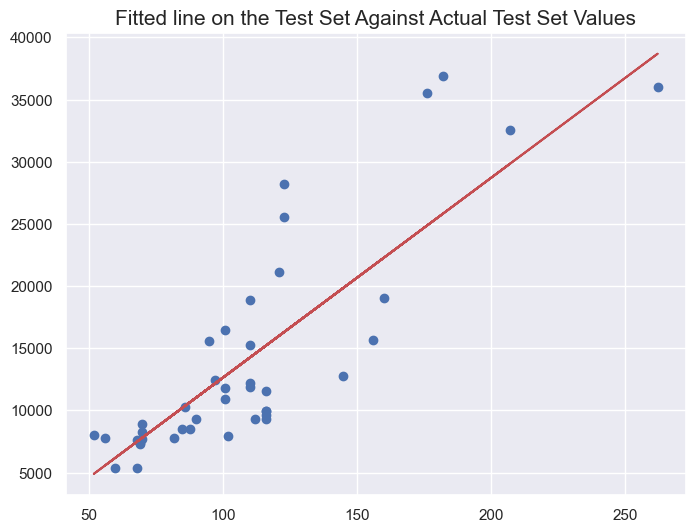

In [192]:
# Plot how well the predicted values fit
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(X_test["horsepower"], y_test)
plt.plot(X_test["horsepower"], y_pred, color = "r")
plt.title("Fitted line on the Test Set Against Actual Test Set Values", fontsize = 15);

In [193]:
y_pred.shape

(41,)

In [194]:
# R squared value on the test data
r2_score(y_test, y_pred)

0.7059239626512623

Model does not generalise well as this is lower than the r2 on the training data

## Multiple Linear Regression

In [195]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,82,3,mitsubishi g4,gas,std,two,hatchback,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499.0
1,14,0,bmw x3,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105.0
2,35,1,honda civic cvcc,gas,std,two,hatchback,fwd,front,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0
3,149,0,subaru dl,gas,std,four,wagon,4wd,front,96.9,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013.0
4,71,-1,buick skyhawk,diesel,turbo,four,sedan,rwd,front,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0


In [196]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

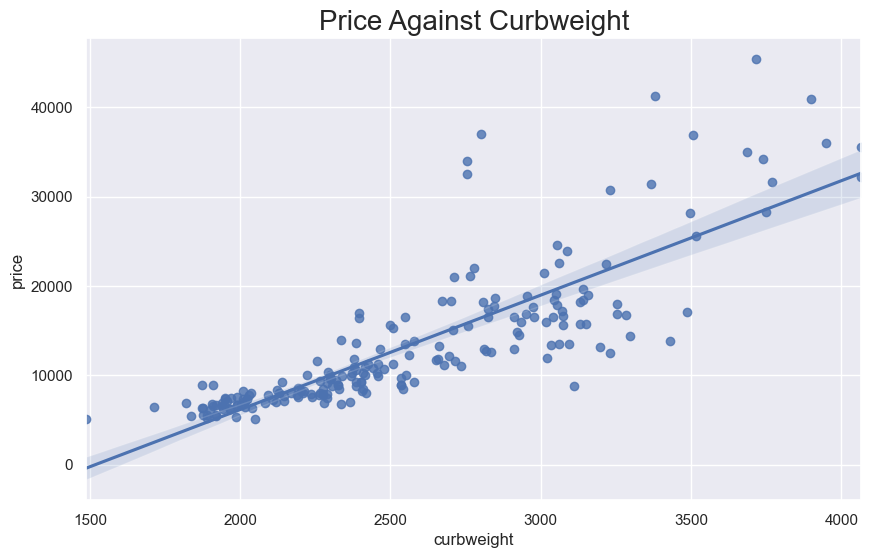

In [197]:
fig, ax = plt.subplots(figsize = (10,6))
sns.regplot(data = df, x = "curbweight", y = "price")
plt.title("Price Against Curbweight", fontsize = 20)
plt.show()

Appears to be a linear relationship

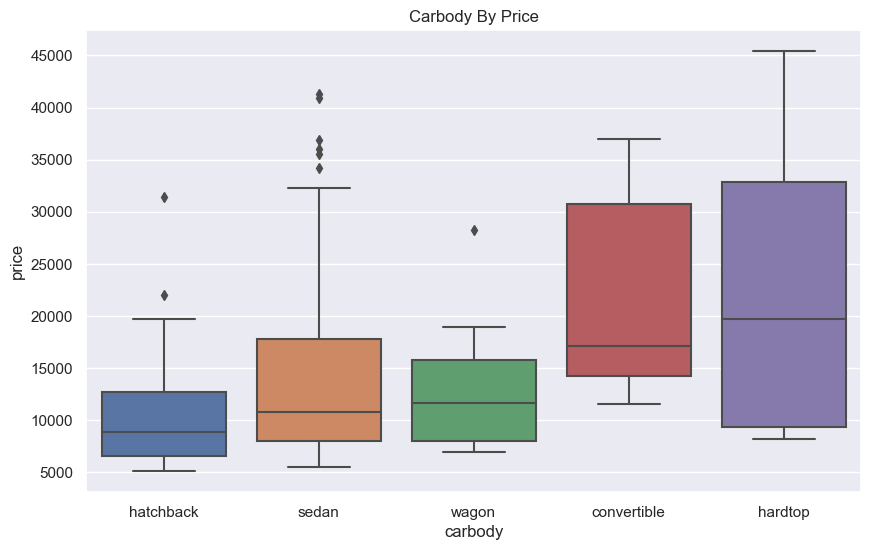

In [198]:
fig, ax = plt.subplots(figsize = (10,6))
sns.boxplot(data = df, x = "carbody", y = "price")
plt.title("Carbody By Price");

Convertibles and hardtops appear to be priced higher

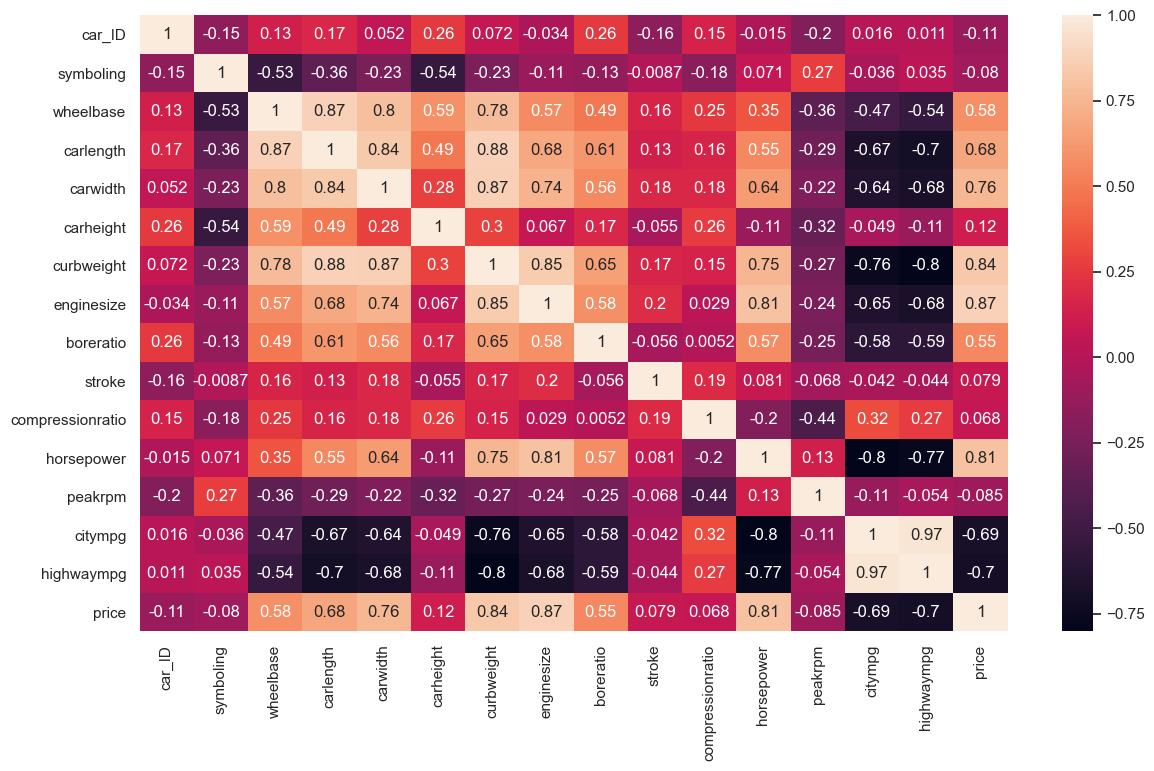

In [199]:
# Correlations
fig, ax = plt.subplots(figsize = (14,8))
sns.heatmap(df.corr(), annot = True);

* Price most highly correlated (relationship strength higher) with car length, width, curbweight, engine size and horsepower.
* Price negatively correlated with highway and city mpg (so cars that deliver higher mileage are priced lower)

In [200]:
# Categorical features - binary for each
cols = ["aspiration","doornumber", "fueltype","enginelocation"]
df[cols].sample(10)

,aspiration,doornumber,fueltype,enginelocation
96,std,four,gas,front
197,std,four,gas,front
82,std,two,gas,front
136,std,two,gas,front
35,std,four,gas,front
3,std,four,gas,front
172,std,four,gas,front
42,std,two,gas,front
53,turbo,four,diesel,front
192,std,four,gas,front


In [201]:
# Convert each binary categorical feature to numerical form
label = LabelEncoder()

for col in cols:
    df[col] = label.fit_transform(df[col])

In [202]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,82,3,mitsubishi g4,1,0,1,hatchback,fwd,0,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499.0
1,14,0,bmw x3,1,0,0,sedan,rwd,0,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105.0
2,35,1,honda civic cvcc,1,0,1,hatchback,fwd,0,93.7,...,92,1bbl,2.91,3.41,9.2,76,6000,30,34,7129.0
3,149,0,subaru dl,1,0,0,wagon,4wd,0,96.9,...,108,2bbl,3.62,2.64,9.0,82,4800,23,29,8013.0
4,71,-1,buick skyhawk,0,1,0,sedan,rwd,0,115.6,...,183,idi,3.58,3.64,21.5,123,4350,22,25,31600.0


In [203]:
# Drop unwanted columns
df = df.drop(columns = ["car_ID", "CarName"], axis = 1)

In [204]:
df.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [205]:
# Split out categorical columns which we haven't processed with labelencoder with one-hot encoding
cat_cols = df[["carbody","enginetype","drivewheel","fuelsystem","cylindernumber" ]]
for col in cat_cols:
    df = pd.concat([df.drop(col,axis = 1),
                   pd.get_dummies(df[col],
                    prefix = col,
                    prefix_sep = '_',
                    drop_first = True)],axis = 1)

In [206]:
df.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,3,1,0,1,0,96.3,173.0,65.4,49.4,2328,...,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0,0,101.2,176.8,64.8,54.3,2765,...,0,1,0,0,0,0,1,0,0,0
2,1,1,0,1,0,93.7,150.0,64.0,52.6,1956,...,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0,0,96.9,173.6,65.4,54.9,2420,...,0,0,0,0,0,1,0,0,0,0
4,-1,0,1,0,0,115.6,202.6,71.7,56.3,3770,...,0,0,0,0,1,0,0,0,0,0


In [207]:
df.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.439024,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,...,0.004878,0.458537,0.043902,0.004878,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512
std,1.245307,0.297446,0.385535,0.497483,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,...,0.069843,0.499498,0.205380,0.069843,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655
min,-2.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,0.000000,1.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* For ML models we would normally scale the continuous variables
* Does not seem to affect the p-values for not scaling, although the coefficients will change if we do scale

In [208]:
# Shuffle the data so the model has to learn from scratch
df = df.sample(frac = 1).reset_index(drop = True)

In [209]:
# Set X and y variables
X = df.drop(columns = ["price"], axis = 1)
y = df.price

In [210]:
# Add constant
X = sm.add_constant(X)

In [211]:
# Concat to get training and test sets
xy = pd.concat([X,y],axis = 1)
xy.head(2)

,const,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,price
0,1.0,1,1,0,1,0,93.7,150.0,64.0,52.6,...,0,0,0,0,1,0,0,0,0,7129.0
1,1.0,0,1,0,1,0,96.5,167.5,65.2,53.3,...,0,0,0,0,1,0,0,0,0,9095.0


In [212]:
# Split data into training and test set
train = xy.sample(frac = 0.8)
test = xy.drop(train.index)

In [213]:
# Split into X and y train and test sets
X_train = train.drop(columns = "price")
y_train = train[["price"]]
X_test = test.drop(columns = "price")
y_test = test[["price"]]

In [214]:
# Check sizes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(164, 44) (41, 44) (164, 1) (41, 1)


In [215]:
# Fit model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     49.76
Date:                Tue, 10 Jan 2023   Prob (F-statistic):           4.75e-59
Time:                        10:33:23   Log-Likelihood:                -1474.3
No. Observations:                 164   AIC:                             3031.
Df Residuals:                     123   BIC:                             3158.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7557.4703   1.24e+04     -0.611      0.542    -3.2e+04    1.69e+04
symboling                65.7351    289.204      0.227      0.821    -506.727     638.197
fueltype              -1.337e+04   6164.276     -2.169      0.032   -2.56e+04   -1169.089
aspiration             3175.5437   1171.122      2.712      0.008     857.379    5493.708
doornumber              503.3608    700.501      0.719      0.474    -883.238    1889.959
enginelocation         7813.1972   2765.220      2.826      0.006    2339.613    1.33e+04
wheelbase               -19.9428    111.647     -0.179      0.859    -240.941     201.055
carlength                -0.7754     62.015     -0.013      0.990    -123.530     121.980
carwidth                581.1166    285.669      2.034      0.044      15.652    1146.582
carheight                36.9765    145.740      0.254      0.800    -251.507     325.460
curbweight                6.1782      2.171      2.846      0.005       1.881      10.475
enginesize               89.8535     33.932      2.648      0.009      22.687     157.020
boreratio             -1454.9597   1759.151     -0.827      0.410   -4937.091    2027.172
stroke                -4212.2144   1053.966     -3.997      0.000   -6298.476   -2125.953
compressionratio      -1483.7229    619.869     -2.394      0.018   -2710.715    -256.731
horsepower              -16.8040     26.023     -0.646      0.520     -68.316      34.708
peakrpm                   2.7911      0.695      4.017      0.000       1.416       4.166
citympg                 -14.8894    179.869     -0.083      0.934    -370.930     341.151
highwaympg              104.1530    162.612      0.641      0.523    -217.727     426.033
carbody_hardtop       -3584.9154   1477.410     -2.426      0.017   -6509.358    -660.472
carbody_hatchback     -4180.6876   1367.314     -3.058      0.003   -6887.202   -1474.173
carbody_sedan         -3085.2193   1529.963     -2.017      0.046   -6113.687     -56.752
carbody_wagon         -4867.7892   1689.752     -2.881      0.005   -8212.550   -1523.028
enginetype_dohcv      -5946.0058   6146.836     -0.967      0.335   -1.81e+04    6221.280
enginetype_l          -1511.7730   1885.235     -0.802      0.424   -5243.480    2219.934
enginetype_ohc         3713.7592   1029.638      3.607      0.000    1675.655    5751.864
enginetype_ohcf        2781.6971   1759.371      1.581      0.116    -700.869    6264.263
enginetype_ohcv       -5486.0087   1380.852     -3.973      0.000   -8219.321   -2752.696
enginetype_rotor      -3103.6745   2103.763     -1.475      0.143   -7267.945    1060.596
drivewheel_fwd          851.5026   1642.939      0.518      0.605   -2400.594    4103.599
drivewheel_rwd         1449.6791   1875.421      0.773      0.441   -2262.601    5161.960
fuelsystem_2bbl        

* The adjusted r2 is close to r squared indicating most independent variables are important to the model
* The f-statistic indicates we have a valid model
* 

In [216]:
# Get p-values in order of significance (smaller more significant below 5%)
pd.DataFrame(model.pvalues).sort_values(by = 0)

,0
peakrpm,0.000102
stroke,0.000110
enginetype_ohcv,0.000120
enginetype_ohc,0.000449
cylindernumber_five,0.000464
cylindernumber_four,0.000592
fuelsystem_spdi,0.002227
carbody_hatchback,0.002738
cylindernumber_six,0.003575
carbody_wagon,0.004682


In [217]:
# Get predicted values
y_pred = pd.DataFrame(model.predict(X_test))
compare = pd.concat([y_pred, y_test],axis = 1)
compare.columns = ["predicted","actual"]
compare.head()

,predicted,actual
1,10310.771421,9095.0
2,7370.385674,9988.0
3,12157.753994,18344.0
22,26336.715242,28248.0
27,6637.128633,7198.0


In [218]:
# Get r2 score on the test set
r2_score(y_pred, y_test)

0.9014606771378031

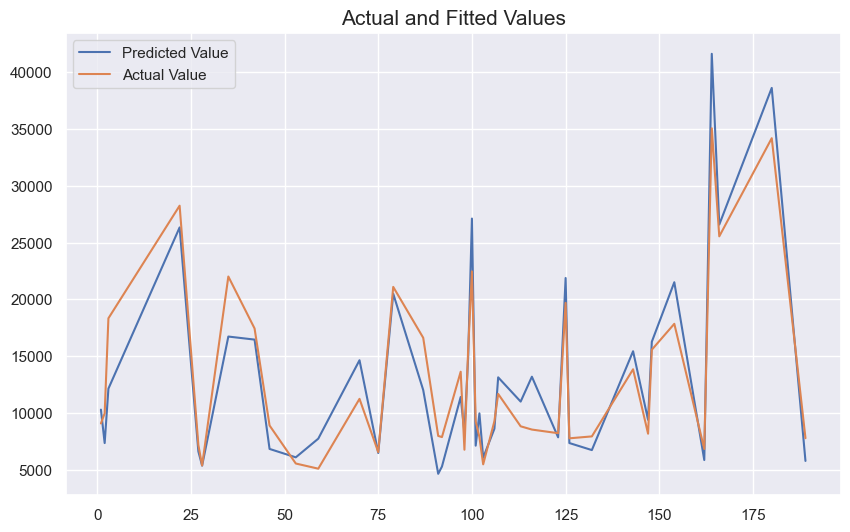

In [219]:
# Plot the actual and predicted values
fig, axs = plt.subplots(figsize = (10,6))
plt.plot(compare["predicted"])
plt.plot(compare["actual"])
plt.title("Actual and Fitted Values", fontsize = 15)
plt.legend(["Predicted Value","Actual Value"]);

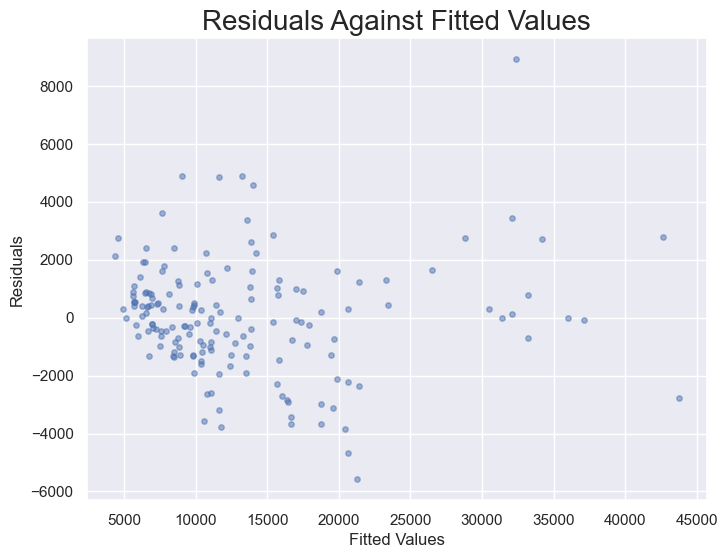

In [220]:
# Get fitted values and residuals from the model
res = model.resid
fit = model.fittedvalues

# Plot residuals against fitted values
fig, ax = plt.subplots(figsize = (8,6))
plt.scatter(x = fit, y = res, s = 15, alpha = 0.5)
plt.title("Residuals Against Fitted Values", fontsize = 20)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals");

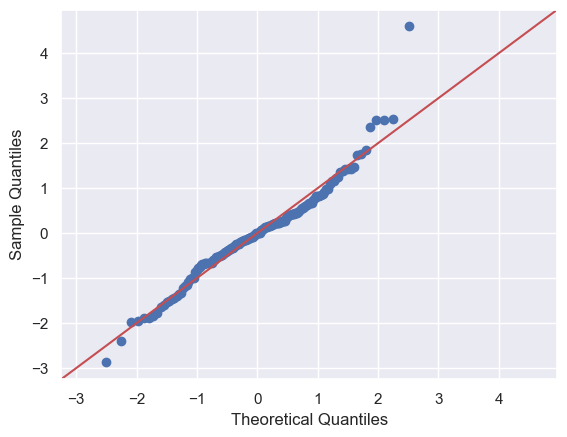

In [221]:
res = model.resid
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

The residuals are fairly well distributed with no obvious patterns so we can say that the model is good.

# Generalised Linear Model

In [222]:
data = sm.datasets.star98.load()

In [223]:
# Check the independent variable
data.exog.head()

,LOWINC,PERASIAN,PERBLACK,PERHISP,PERMINTE,AVYRSEXP,AVSALK,PERSPENK,PTRATIO,PCTAF,PCTCHRT,PCTYRRND,PERMINTE_AVYRSEXP,PERMINTE_AVSAL,AVYRSEXP_AVSAL,PERSPEN_PTRATIO,PERSPEN_PCTAF,PTRATIO_PCTAF,PERMINTE_AVYRSEXP_AVSAL,PERSPEN_PTRATIO_PCTAF
0,34.39730,23.299300,14.235280,11.411120,15.91837,14.70646,59.15732,4.445207,21.71025,57.03276,0.0,22.222220,234.102872,941.68811,869.9948,96.50656,253.52242,1238.1955,13848.8985,5504.0352
1,17.36507,29.328380,8.234897,9.314884,13.63636,16.08324,59.50397,5.267598,20.44278,64.62264,0.0,0.000000,219.316851,811.41756,957.0166,107.68435,340.40609,1321.0664,13050.2233,6958.8468
2,32.64324,9.226386,42.406310,13.543720,28.83436,14.59559,60.56992,5.482922,18.95419,53.94191,0.0,0.000000,420.854496,1746.49488,884.0537,103.92435,295.75929,1022.4252,25491.1232,5605.8777
3,11.90953,13.883090,3.796973,11.443110,11.11111,14.38939,58.33411,4.165093,21.63539,49.06103,0.0,7.142857,159.882095,648.15671,839.3923,90.11341,204.34375,1061.4545,9326.5797,4421.0568
4,36.88889,12.187500,76.875000,7.604167,43.58974,13.90568,63.15364,4.324902,18.77984,52.38095,0.0,0.000000,606.144976,2752.85075,878.1943,81.22097,226.54248,983.7059,38280.2616,4254.4314


In [224]:
# Add a constant so it doesn't pass through the origin
data.exog = sm.add_constant(data.exog)

In [225]:
# Specify the family
glm_binom = sm.GLM(data.endog, data.exog, family = sm.families.Binomial())
glm_result = glm_binom.fit()
glm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     ['NABOVE', 'NBELOW']   No. Observations:                  303
Model:                              GLM   Df Residuals:                      282
Model Family:                  Binomial   Df Model:                           20
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -2998.6
Date:                  Tue, 10 Jan 2023   Deviance:                       4078.8
Time:                          10:33:24   Pearson chi2:                 4.05e+03
No. Iterations:                       5   Pseudo R-squ. (CS):              1.000
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.9589      1.547      1.913      0.056      -0.073       5.990
LOWINC                     -0.0168      0.000    -38.749      0.000      -0.018      -0.016
PERASIAN                    0.0099      0.001     16.505      0.000       0.009       0.011
PERBLACK                   -0.0187      0.001    -25.182      0.000      -0.020      -0.017
PERHISP                    -0.0142      0.000    -32.818      0.000      -0.015      -0.013
PERMINTE                    0.2545      0.030      8.498      0.000       0.196       0.313
AVYRSEXP                    0.2407      0.057      4.212      0.000       0.129       0.353
AVSALK                      0.0804      0.014      5.775      0.000       0.053       0.108
PERSPENK                   -1.9522      0.317     -6.162      0.000      -2.573      -1.331
PTRATIO                    -0.3341      0.061     -5.453      0.000      -0.454      -0.214
PCTAF                      -0.1690      0.033     -5.169      0.000      -0.233      -0.105
PCTCHRT                     0.0049      0.001      3.921      0.000       0.002       0.007
PCTYRRND                   -0.0036      0.000    -15.878      0.000      -0.004      -0.003
PERMINTE_AVYRSEXP          -0.0141      0.002     -7.391      0.000      -0.018      -0.010
PERMINTE_AVSAL             -0.0040      0.000     -8.450      0.000      -0.005      -0.003
AVYRSEXP_AVSAL             -0.0039      0.001     -4.059      0.000      -0.006      -0.002
PERSPEN_PTRATIO             0.0917      0.015      6.321      0.000       0.063       0.120
PERSPEN_PCTAF               0.0490      0.007      6.574      0.000       0.034       0.064
PTRATIO_PCTAF               0.0080      0.001      5.362      0.000       0.005       0.011
PERMINTE_AVYRSEXP_AVSAL     0.0002   2.99e-05      7.428      0.000       0.000       0.000
PERSPEN_PTRATIO_PCTAF      -0.0022      0.000     -6.445      0.000      -0.003      -0.002
===========================================================================================
"""

In [226]:
# Fitted values - probabilities student is above or below the national median
glm_result.fittedvalues[0:10]

0    0.583312
1    0.751447
2    0.500583
3    0.685345
4    0.322510
5    0.686936
6    0.332998
7    0.656248
8    0.498515
9    0.506736
dtype: float64

Note: Robust Linear Model example is not included here but is useful where you have outliers.

# Time Series Analysis - Temperature Data

In [227]:
temp = pd.read_csv("C:/Users/imoge/Projects/Datasets/daily-minimum-temperatures-in-me.csv", 
                   skiprows = 1, 
                   usecols = [1],
                  names = ["Temp"],
                  dtype = np.float,
                  sep = ",")

In [228]:
temp.shape

(3649, 1)

In [229]:
temp.head()

,Temp
0,17.9
1,18.8
2,14.6
3,15.8
4,15.8


In [230]:
temp.describe()

,Temp
count,3649.000000
mean,11.175144
std,4.069341
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


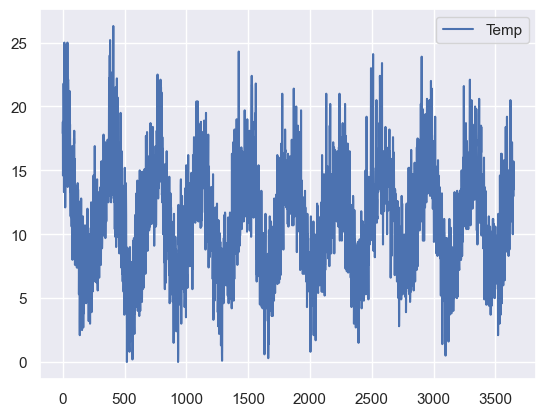

In [231]:
temp.plot();

The data appears to be stationary. There is some seasonal variation but it does seem to oscillate around the mean and there does not appear to be non-constant variance

In [232]:
rmean = temp.rolling(window = 30).mean()
rstd = temp.rolling(window = 30).std()

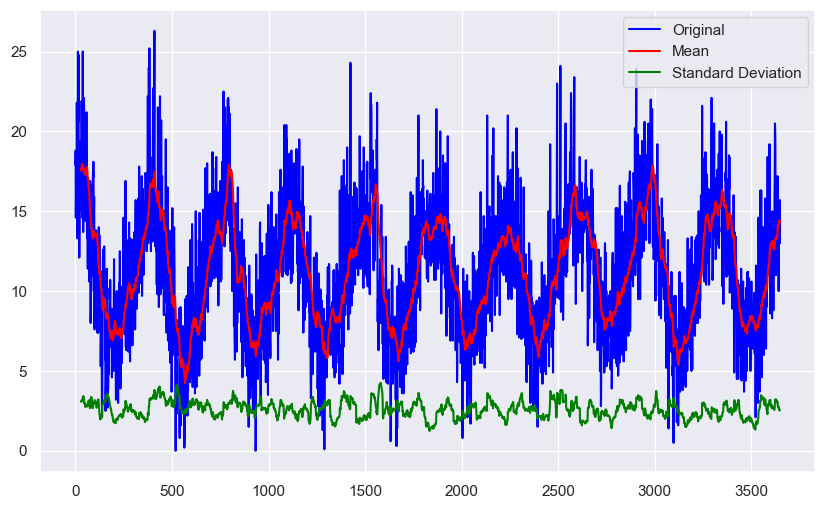

In [233]:
fig, ax = plt.subplots(figsize = (10,6))
orig = plt.plot(temp,color = "blue", label = "Original")
mean = plt.plot(rmean, color = "red", label = "Mean")
rstd = plt.plot(rstd, color = "green", label = "Standard Deviation")
plt.legend();

# Plot the autocorrelations
t = temp.values
sm.graphics.tsa.plot_acf(t, lags = 100);

No cutoff, the autocorrelation tapers off very slowly and would need too many lags - moving average model not suitable

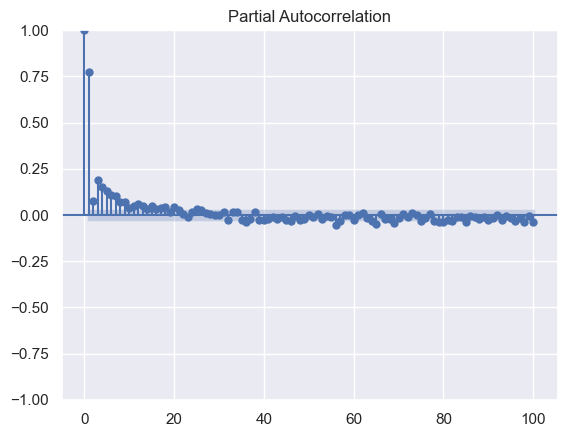

In [234]:
# Partial autocorrelations
sm.graphics.tsa.plot_pacf(t, lags = 100);

The PACF shows that the partial autocorrelations drop in significance from the third lag and then reduces completely after around 10 lags. An autoregressive model seems to be the best solution here

In [236]:
# Set up some models to test
mod1 = sm.tsa.ARIMA(temp.Temp, order = (2,0,0)).fit()
mod2 = sm.tsa.ARIMA(temp.Temp, order = (3,0,0)).fit()
mod3 = sm.tsa.ARIMA(temp.Temp, order = (5,0,0)).fit()
mod4 = sm.tsa.ARIMA(temp.Temp, order = (7,0,0)).fit()
mod5 = sm.tsa.ARIMA(temp.Temp, order = (10,0,0)).fit()

In [237]:
print(mod1.aicc, mod1.bic, mod1.hqic)
print(mod2.aicc, mod2.bic, mod2.hqic)
print(mod3.aicc, mod3.bic, mod3.hqic)
print(mod4.aicc, mod4.bic, mod4.hqic)
print(mod5.aicc, mod5.bic, mod5.hqic)

17239.662153055982 17264.46000985332 17248.486403623785
17106.421431943956 17137.416004183782 17117.448996396863
16963.467051051543 17006.85174932659 16978.897938424903
16884.334939582503 16940.10535137193 16904.164737355473
16846.288192615524 16920.628885271904 16872.7080665833


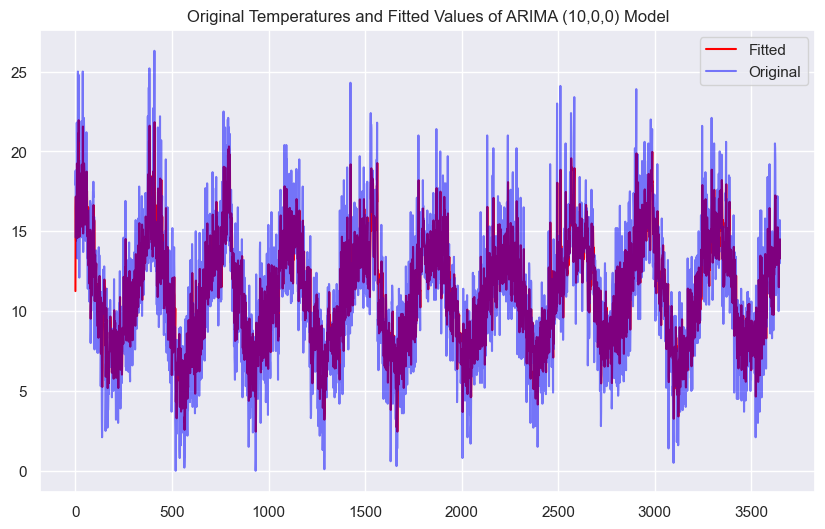

In [238]:
fi, ax = plt.subplots(figsize = (10,6))
plt.plot(mod5.fittedvalues, color = "red", label = "Fitted")
plt.plot(temp, color = "blue", alpha = 0.5,label = "Original")
plt.title("Original Temperatures and Fitted Values of ARIMA (10,0,0) Model")
plt.legend()